In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

## Loading and Preprocessing employee attrition Encoded Data

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
employee_attrition_df = pd.read_csv("Resources/employees_numeric.csv")

# Review the DataFrame
display(employee_attrition_df.head())
display(employee_attrition_df.tail())

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,company_tenure,work_accident,left,promotion_last_5years,department_IT,...,department_engineering,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,salary_high,salary_low,salary_medium
0,0,0.38,0.53,2,157,3,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,0.80,0.86,5,262,6,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,0.11,0.88,7,272,4,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,0.72,0.87,5,223,5,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,0.37,0.52,2,159,3,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


,Unnamed: 0,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,company_tenure,work_accident,left,promotion_last_5years,department_IT,...,department_engineering,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,salary_high,salary_low,salary_medium
14994,14994,0.40,0.57,2,151,3,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
14995,14995,0.37,0.48,2,160,3,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
14996,14996,0.37,0.53,2,143,3,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
14997,14997,0.11,0.96,6,280,4,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
14998,14998,0.37,0.52,2,158,3,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [3]:
# Drop the non-beneficial ID columns, 'employee_id'.
employee_attrition_df = employee_attrition_df.drop(columns=['Unnamed: 0'], axis=1)
employee_attrition_df.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,company_tenure,work_accident,left,promotion_last_5years,department_IT,department_R&D,...,department_engineering,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [4]:
# Define features set
X = employee_attrition_df.copy()
X.drop("left", axis=1, inplace=True)
X.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,company_tenure,work_accident,promotion_last_5years,department_IT,department_R&D,department_accounting,department_engineering,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [5]:
# Define target vector
y = employee_attrition_df["left"].ravel()
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [8]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [10]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2850,14
Actual 1,45,841


Accuracy Score : 0.9842666666666666
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2864
           1       0.98      0.95      0.97       886

    accuracy                           0.98      3750
   macro avg       0.98      0.97      0.98      3750
weighted avg       0.98      0.98      0.98      3750



## Feature Importance

In [15]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3112506578095207, 'satisfaction_level'),
 (0.1858878822977852, 'number_project'),
 (0.18504575964630957, 'company_tenure'),
 (0.1497276768867675, 'avg_monthly_hours'),
 (0.12127187898774985, 'last_evaluation'),
 (0.009919722889367422, 'work_accident'),
 (0.005919786740319973, 'salary_low'),
 (0.005455903150862289, 'salary_high'),
 (0.003530117815134433, 'department_engineering'),
 (0.003458300921405062, 'salary_medium'),
 (0.0030420206031874166, 'department_sales'),
 (0.002907356571556364, 'department_support'),
 (0.0018309061303712685, 'department_accounting'),
 (0.00177223931054513, 'department_hr'),
 (0.0017603574716045388, 'department_IT'),
 (0.001668928393600573, 'promotion_last_5years'),
 (0.0016687514503432855, 'department_R&D'),
 (0.0014848397000307102, 'department_management'),
 (0.0013055160771291985, 'department_marketing'),
 (0.0010913971464094599, 'department_product_mng')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

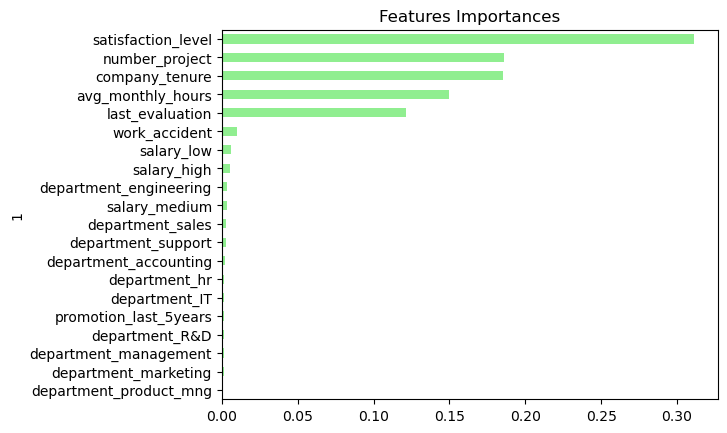

In [16]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)